In [1]:
import splat as sp
import joblib
import sklearn
import seaborn as sns
import pickle
from astropy.io import fits
from zipfile import ZipFile
import matplotlib.pyplot as plt
from multioutput_functions import *
import math
singles = pd.read_hdf(r'C:/Users/juand/Research/h5_files/singles_230801.h5')
wave = singles['WAVE'][0]
wavegrid_list=list(wave)
wave = np.array(wave)
wavegrid=wave



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
mod = '_G1'
rf_low_G1 = joblib.load('RFclassifiers/RF_low'+mod+'.joblib')
rf_mid_G1 = joblib.load('RFclassifiers/RF_mid'+mod+'.joblib')
rf_hig_G1 = joblib.load('RFclassifiers/RF_hig'+mod+'.joblib')
mod = '_G2'
rf_low_G2 = joblib.load('RFclassifiers/RF_low'+mod+'.joblib')
rf_mid_G2 = joblib.load('RFclassifiers/RF_mid'+mod+'.joblib')
rf_hig_G2 = joblib.load('RFclassifiers/RF_hig'+mod+'.joblib')
mod = '_G3'
rf_low_G3 = joblib.load('RFclassifiers/RF_low'+mod+'.joblib')
rf_mid_G3 = joblib.load('RFclassifiers/RF_mid'+mod+'.joblib')
rf_hig_G3 = joblib.load('RFclassifiers/RF_hig'+mod+'.joblib')
mod = '_G4'
rf_low_G4 = joblib.load('RFclassifiers/RF_low'+mod+'.joblib')
rf_mid_G4 = joblib.load('RFclassifiers/RF_mid'+mod+'.joblib')
rf_hig_G4 = joblib.load('RFclassifiers/RF_hig'+mod+'.joblib')

In [3]:
def findname(namestring):
    name_match = re.search(r"\d*\s*(J*\d+\.*\d*\+*\-*\d+\.*\d*)", namestring)
    if name_match:
        name = name_match.group(1)
        name1= name[:5]
        name2= re.search(r"J*\d+\.*\d*(\+*\-*\d+\.*\d*)", name).group(1)[:5]
        name = name1+name2
    else:
        name = ''
    return name

In [4]:
with open(r'C:/Users/juand/Research/h5_files/splatzenodo.pickle', 'rb') as f:
        ultracs = pickle.load(f)
with open(r'C:/Users/juand/Research/h5_files/barddf.pickle', 'rb') as f:
        bardalez = pickle.load(f)
confbin = pd.concat([ultracs,bardalez]).reset_index(drop=True)
confbin.head()

,name,type_binary,spt_pri,spt_sec,sptnum_pri,sptnumerr_pri,sptnum_sec,sptnumerr_sec,spt_method_bin,ref_spt_bin
0,SDSS J000649.16-085246.3,SB1,M8.5,T5,18.5,0.5,35.0,1.0,IR-decomp,Burg12b
1,2MASS J01303563-4445411,visual,M9,L6,19.0,0.5,26.0,1.0,IR-direct,Dhit11
2,2MASSW J0320284-044636,SB1,M8.5,T5,18.5,0.5,35.0,1.0,IR-decomp,Burg08c
3,DENIS-P J035726.9-441730,visual,M9,L1.5,19.0,NaN,21.5,NaN,Opt-direct,Mart06b
4,SDSSp J042348.57-041403.5,visual,L6.5:,T2,26.5,1.0,32.0,0.5,IR-decomp,Dupu12


In [5]:
def classifstars(df):
    tm = np.logical_or(np.logical_and(wave > 1.35,wave < 1.42), np.logical_and(wave > 1.8,wave < 1.95))
    classif_G1=[]
    classif_G2=[]
    classif_G3=[]
    classif_G4=[]
    for i in range(len(df)):
        name = findname(df.name.iloc[i])   
        sp0= sp.getSpectrum(shortname = name)[0]    
        wave0  = sp0.wave.value
        flux0  = np.array(interpolate_flux_wave(wave0, sp0.flux.value, wgrid=wavegrid))
        noise0 = interpolate_flux_wave(wave0, sp0.noise.value, wgrid=wavegrid)
        flux0, noise0 = normalize(wave, flux0, noise0)
        # fluxT = flux0[~tm]
        # noiseT = noise0[~tm]
        SNR = measureSN(wave, flux0, noise0, rng=[1.2, 1.35])
        # fastspt = typeToNum(fast_classify(wave,flux0,noise0))
        if SNR<50:
            classif_G1.append(list(rf_low_G1.predict([flux0]))[0])
            classif_G2.append(list(rf_low_G2.predict([flux0]))[0])
            classif_G3.append(list(rf_low_G3.predict([flux0]))[0])
            classif_G4.append(list(rf_low_G4.predict([flux0]))[0])
        elif SNR>100:
            classif_G1.append(list(rf_mid_G1.predict([flux0]))[0])
            classif_G2.append(list(rf_mid_G2.predict([flux0]))[0])
            classif_G3.append(list(rf_mid_G3.predict([flux0]))[0])
            classif_G4.append(list(rf_mid_G4.predict([flux0]))[0])
        else:
            classif_G1.append(list(rf_hig_G1.predict([flux0]))[0])
            classif_G2.append(list(rf_hig_G2.predict([flux0]))[0])
            classif_G3.append(list(rf_hig_G3.predict([flux0]))[0])
            classif_G4.append(list(rf_hig_G4.predict([flux0]))[0])
    return classif_G1, classif_G2, classif_G3, classif_G4

In [6]:
G1,G2,G3,G4 = classifstars(confbin)


Retrieving 1 file


Retrieving 2 files


Retrieving 1 file


Retrieving 1 file


Retrieving 2 files


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 2 files


Retrieving 2 files


Retrieving 1 file


Retrieving 3 files


Retrieving 2 files


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 2 files


Retrieving 2 files


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 2 files


Retrieving 2 files


Retrieving 1 file


Retrieving 1 file


Retrieving 3 files


Retrieving 1 file


Retrieving 3 files


Retrieving 1 file


Retrieving 2 files


Retrieving 3 files


Retrieving 3 files


Retrieving 1 file


Retrieving 2 files


Retrieving 2 files


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 1 file


Retrieving 2 files


Retrieving 2 files


Retrieving 1 file


Retrieving 1 file




In [7]:
np.mean(G1)

0.37037037037037035

In [8]:
np.mean(G2)

0.25925925925925924

In [9]:
np.mean(G3)

0.7777777777777778

In [10]:
np.mean(G4)

0.5925925925925926

In [12]:
len(G3)

54

In [14]:
G3.count(0)

12

In [20]:
np.where(np.array(G3)==0)[0]

array([ 3,  5, 18, 22, 23, 25, 30, 32, 34, 37, 39, 51], dtype=int64)

In [21]:
confbin.sptnum_pri[np.where(np.array(G3)==0)[0]]

3     19.0
5     38.5
18    27.0
22    35.5
23    25.5
25    22.5
30    34.5
32    36.5
34    38.0
37    27.0
39    19.0
51    22.3
Name: sptnum_pri, dtype: float64

In [28]:
pri = np.array(confbin.sptnum_pri)
sec = np.array(confbin.sptnum_sec)
fpri = np.array([math.floor(i) for i in pri])
fsec = np.array([math.floor(i) for i in sec])
upri = unique(fpri)
usec = unique(fsec)

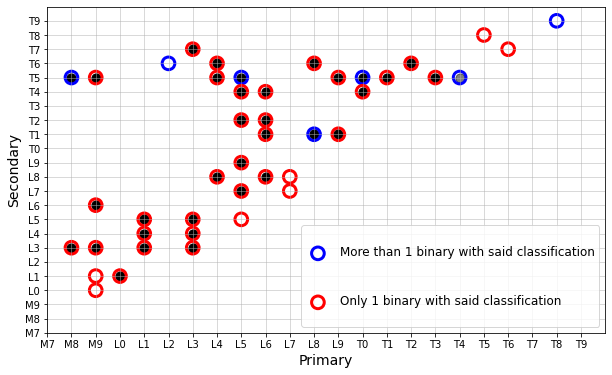

In [32]:
spts = ['M7','M8','M9','L0','L1','L2','L3','L4','L5','L6','L7','L8','L9','T0','T1','T2','T3','T4','T5','T6','T7','T8','T9']
plt.subplots(figsize=(10,6))
plt.grid(alpha=0.6)
plt.xticks(list(range(17,40)),spts)
plt.yticks(list(range(17,40)),spts)
plt.xlim(17,40)
plt.ylim(17,40)
plt.xlabel('Primary',size=14)
plt.ylabel('Secondary',size=14)
for p in upri:
    for s in usec:
        classif = np.array(G3)[(fpri==p) & (fsec==s)]
        if len(classif):
            plt.scatter(math.floor(p),math.floor(s),s=85,alpha=np.mean(classif),c='k')
        if len(classif)==1:
            if (p<19)&(s>34):
                continue
            plt.scatter(math.floor(p),math.floor(s),facecolors='none',s=160,edgecolors='r',linewidth=3)
        elif len(classif)>1:
            plt.scatter(math.floor(p),math.floor(s),facecolors='none',s=160,edgecolors='b',linewidth=3)
plt.scatter(15,15,facecolors='none',s=160,edgecolors='b',linewidth=3,label='\nMore than 1 binary with said classification\n')
plt.scatter(15,15,facecolors='none',s=160,edgecolors='r',linewidth=3,label='\nOnly 1 binary with said classification\n')
plt.legend(loc=4,fontsize=12)
plt.savefig('paperfigures/confbin_classif',facecolor='white')

In [33]:
sklearn.metrics.f1_score(np.ones(len(G3)),G3)

0.8750000000000001

In [37]:
sklearn.metrics.accuracy_score(np.ones(len(G3)),G3)

0.7777777777777778

In [23]:
confbin.sptnum_pri[np.where(np.array(G3)==0)[0]]

3     19.0
5     38.5
18    27.0
22    35.5
23    25.5
25    22.5
30    34.5
32    36.5
34    38.0
37    27.0
39    19.0
51    22.3
Name: sptnum_pri, dtype: float64

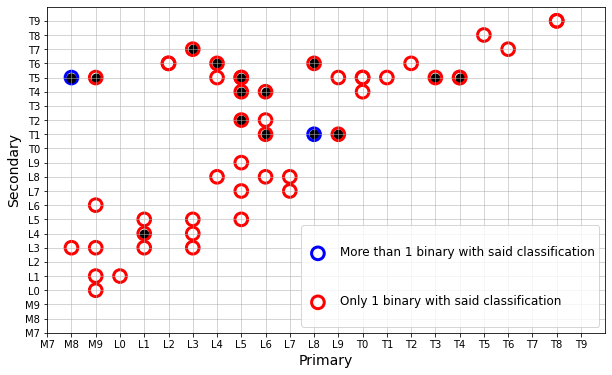

In [150]:
spts = ['M7','M8','M9','L0','L1','L2','L3','L4','L5','L6','L7','L8','L9','T0','T1','T2','T3','T4','T5','T6','T7','T8','T9']
plt.subplots(figsize=(10,6))
plt.grid(alpha=0.65)
plt.xticks(list(range(17,40)),spts)
plt.yticks(list(range(17,40)),spts)
plt.xlim(17,40)
plt.ylim(17,40)
plt.xlabel('Primary',size=14)
plt.ylabel('Secondary',size=14)
for p in upri:
    for s in usec:
        classif = np.array(G1)[(confbin.sptnum_pri==p) & (confbin.sptnum_sec==s)]
        if len(classif):
            plt.scatter(math.floor(p),math.floor(s),s=80,alpha=np.mean(classif),c='k')
        if len(classif)==1:
            if (p<19)&(s>34):
                continue
            plt.scatter(math.floor(p),math.floor(s),facecolors='none',s=160,edgecolors='r',linewidth=3)
        elif len(classif)>1:
            plt.scatter(math.floor(p),math.floor(s),facecolors='none',s=160,edgecolors='b',linewidth=3)
plt.scatter(15,15,facecolors='none',s=160,edgecolors='b',linewidth=3,label='\nMore than 1 binary with said classification\n')
plt.scatter(15,15,facecolors='none',s=160,edgecolors='r',linewidth=3,label='\nOnly 1 binary with said classification\n')
plt.legend(loc=4,fontsize=12)